# Análise Exploratória de Dados


### Autor: André Rizzo

## Carregar bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
import os

# Adiciona a raiz do projeto ao sys.path (ajuste se necessário)
sys.path.append(os.path.abspath(".."))

# Imports dos módulos

from src.preprocessing.load_data import ( 
    criar_amostra_rapida, 
    load_datasets_local,
    check_duplicates, 
    check_empty_records
)

from src.preprocessing.data_cleaner import (
    limpar_e_normalizar_books_data, 
    limpar_books_rating
)

## Carregar datasets

In [2]:
books_data, books_rating = load_datasets_local()

## Overview dos Dados

In [4]:
books_data.head()


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [5]:
books_rating.head()

,Id,Title,Price,User_id,profileName,score,time,summary,text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Verificações Iniciais

In [6]:
# Tamanho dos datasets
print('================== BOOKS_DATA ===============')
print(f'Número de registros: {books_data.shape[0]}     Número de variáveis: {books_data.shape[1]}')
print('\n================== BOOKS_RATING ===============')
print(f'Número de registros: {books_rating.shape[0]}     Número de variáveis: {books_rating.shape[1]}')

================== BOOKS_DATA ===============
Número de registros: 212404     Número de variáveis: 10

================== BOOKS_RATING ===============
Número de registros: 3000000     Número de variáveis: 9


In [5]:
print('================== BOOKS_DATA ===============\n')
books_data.info()

================== BOOKS_DATA ===============

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [6]:
print('================== BOOKS_RATING ===============\n')
books_rating.info()

================== BOOKS_RATING ===============

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Id           object 
 1   Title        object 
 2   Price        float64
 3   User_id      object 
 4   profileName  object 
 5   score        float64
 6   time         int64  
 7   summary      object 
 8   text         object 
dtypes: float64(2), int64(1), object(6)
memory usage: 206.0+ MB


Optamos por trabalhar com uma amostra dos dados devido a limitação de recursos do ambiente de desenvolvimento.

In [10]:
books_data_rd = criar_amostra_rapida(df=books_data, percentual=10)

Criando amostra rápida de 10% (21,240 registros)
Amostra criada: 21,240 registros


In [11]:
books_rating_rd = criar_amostra_rapida(df=books_rating, percentual=10)

Criando amostra rápida de 10% (300,000 registros)
Amostra criada: 300,000 registros


### Verificando tamanho das novas bases

In [13]:
# Tamanho dos datasets
print('================== BOOKS_DATA ===============')
print(f'Número de registros: {books_data_rd.shape[0]}     Número de variáveis: {books_data_rd.shape[1]}')
print('\n================== BOOKS_RATING ===============')
print(f'Número de registros: {books_rating_rd.shape[0]}     Número de variáveis: {books_rating_rd.shape[1]}')

================== BOOKS_DATA ===============
Número de registros: 21240     Número de variáveis: 10

================== BOOKS_RATING ===============
Número de registros: 300000     Número de variáveis: 9


In [14]:
print('================== BOOKS_DATA ===============\n')
books_data_rd.info()

================== BOOKS_DATA ===============

<class 'pandas.core.frame.DataFrame'>
Index: 21240 entries, 71763 to 145907
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          21240 non-null  object 
 1   description    14408 non-null  object 
 2   authors        18071 non-null  object 
 3   image          16034 non-null  object 
 4   previewLink    18843 non-null  object 
 5   publisher      13684 non-null  object 
 6   publishedDate  18699 non-null  object 
 7   infoLink       18843 non-null  object 
 8   categories     17100 non-null  object 
 9   ratingsCount   5008 non-null   float64
dtypes: float64(1), object(9)
memory usage: 1.8+ MB


In [15]:
print('================== BOOKS_RATING ===============\n')
books_rating_rd.info()

================== BOOKS_RATING ===============

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 2945667 to 321276
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           300000 non-null  object 
 1   Title        299977 non-null  object 
 2   Price        47902 non-null   float64
 3   User_id      243917 non-null  object 
 4   profileName  243902 non-null  object 
 5   score        300000 non-null  float64
 6   time         300000 non-null  int64  
 7   summary      299965 non-null  object 
 8   text         300000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 22.9+ MB


In [16]:
# Verificar duplicatas
check_duplicates(books_data_rd, books_rating_rd)

BOOKS_DATA: 0 registros duplicados
BOOKS_RATING: 252 registros duplicados


In [17]:
# Verificar registros vazios
check_empty_records(books_data_rd, books_rating_rd)

BOOKS_DATA: 0 linhas (registros) em branco
BOOKS_RATING: 0 linhas (registros) em branco


## Análise de Dados Faltantes

### Análise Numérica - books_data

In [18]:
def analisar_dados_faltantes(df, nome_dataset):
    """
    Calcula a quantidade e o percentual de dados faltantes em um DataFrame.
    """
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Dados faltantes': missing_data,
        '% Dados faltantes': missing_percent.round(2)
    })
    
    missing_df_sorted = missing_df.sort_values('% Dados faltantes', ascending=False)
    
    print(f"\n=== ANÁLISE DE DADOS FALTANTES - {nome_dataset} ===")
    return missing_df_sorted
    

bd = analisar_dados_faltantes(books_data, "BOOKS_DATA")
print(bd)


=== ANÁLISE DE DADOS FALTANTES - BOOKS_DATA ===
               Dados faltantes  % Dados faltantes
ratingsCount            162652              76.58
publisher                75886              35.73
description              68442              32.22
image                    52075              24.52
categories               41199              19.40
authors                  31413              14.79
publishedDate            25305              11.91
previewLink              23836              11.22
infoLink                 23836              11.22
Title                        1               0.00


### Análise Numérica - books_rating

In [19]:
# Analisar books_rating
br = analisar_dados_faltantes(books_rating, "BOOKS_RATING")
print(br)


=== ANÁLISE DE DADOS FALTANTES - BOOKS_RATING ===
             Dados faltantes  % Dados faltantes
Price                2518829              83.96
profileName           561905              18.73
User_id               561787              18.73
summary                  407               0.01
Title                    208               0.01
Id                         0               0.00
score                      0               0.00
time                       0               0.00
text                       8               0.00


### Análise Gráfica - books_data

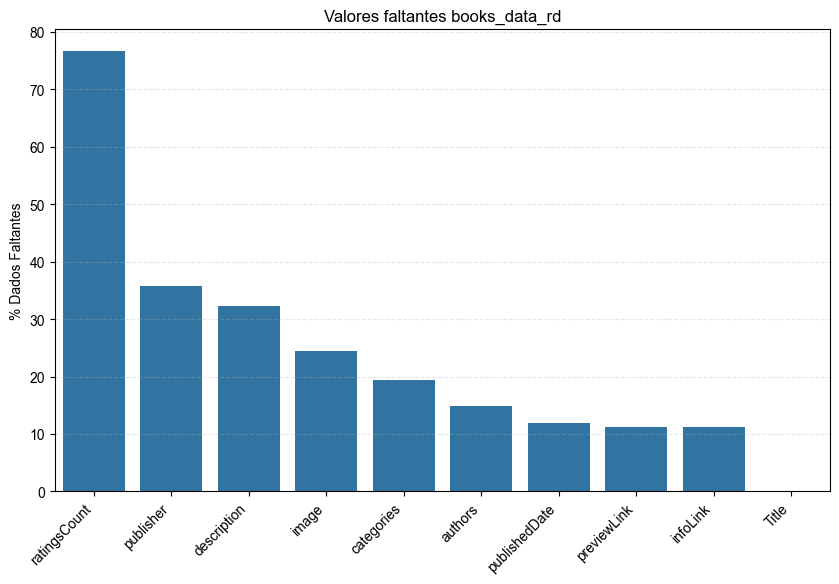

In [20]:
def cria_grafico_mv(variavel, nome_variavel):
    """
    Cria um gráfico de barras para visualização da porcentagem de dados faltantes em uma variável.

    Args:
        variavel (pd.Series ou pd.DataFrame): Série ou estrutura com os valores faltantes em percentual.
                                              Deve conter valores prontos para visualização via `sns.barplot`.
        nome_variavel (str): Nome da variável que será exibido no título do gráfico.

    Returns:
        None. Exibe um gráfico de barras com a distribuição de valores faltantes.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(variavel)
    plt.title(f'Valores faltantes {nome_variavel}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('% Dados Faltantes')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.show()

cria_grafico_mv(bd['% Dados faltantes'], 'books_data_rd')

### Análise Gráfica - books_rating

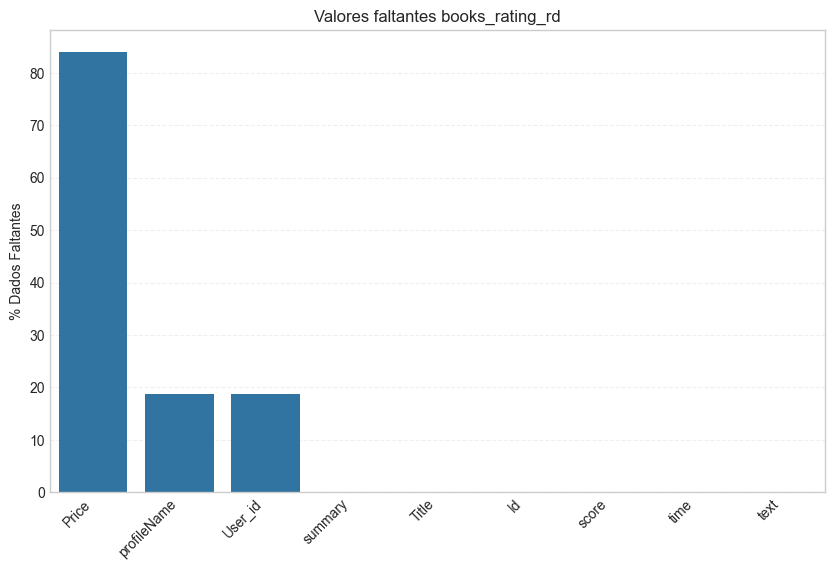

In [21]:
cria_grafico_mv(br['% Dados faltantes'], 'books_rating_rd')

## Limpeza e Normalização

In [22]:
# Aplicar limpeza e normalização
books_data_clean = limpar_e_normalizar_books_data(books_data_rd)
books_rating_clean = limpar_books_rating(books_rating_rd)

Iniciando limpeza e normalização do dataset books_data...
Duplicatas removidas: 0
Normalizando títulos...
Normalizando autores...
Normalizando editoras...
Normalizando categorias...
Padronizando datas...
Removendo duplicatas por similaridade TF-IDF em títulos...
Detectando duplicatas em 'Title_padrao' usando TF-IDF (threshold=0.9)...
Detectadas 4990 duplicatas potenciais.
Removidos 3538 registros duplicados.
Removendo duplicatas por similaridade TF-IDF em autores...
Detectando duplicatas em 'authors_padrao' usando TF-IDF (threshold=0.95)...
Detectadas 6863 duplicatas potenciais.
Removidos 4774 registros duplicados.
Removendo duplicatas exatas por título+autor...
AVISO: 6 duplicatas registradas em: ../data/logs/duplicatas_books_data.csv
Limpeza e normalização concluída!

Relatório final de dados faltantes:
   Title_padrao: 0 (0.0%) faltantes
   authors_padrao: 2,292 (17.7%) faltantes
   publisher_padrao: 4,082 (31.6%) faltantes
   categories_padrao: 2,386 (18.5%) faltantes
   publishedD

## Análise Univariada - books_data

### Variável Title

In [23]:
# Análise de títulos
print("=== ANÁLISE DE TÍTULOS ===")
print(f"Número total de títulos: {len(books_data_clean['Title'])}")
print(f"Títulos únicos: {books_data_clean['Title'].nunique()}")
print(f"Títulos duplicados: {books_data_clean['Title'].duplicated().sum()}")

print("\nTop 10 títulos mais frequentes:")
print(books_data_clean['Title'].value_counts().head(10))

=== ANÁLISE DE TÍTULOS ===
Número total de títulos: 12922
Títulos únicos: 12922
Títulos duplicados: 0

Top 10 títulos mais frequentes:
Title
License to Laugh                                                       1
Motown and Didi (Polk Street Special)                                  1
The FBI-KGB War: A Special Agent's Story                               1
Captain Cook's World: Maps of the Life and Voyages of James Cook RN    1
Mary Magdalene: A Biography                                            1
50 Essential Things to Do when the Doctor Says It's Cancer (Plume)     1
Drums Along the Mohawk                                                 1
DK Readers: Movie Magic (Level 3: Reading Alone)                       1
The Center of the Cyclone: an Autobiography of Inner Space             1
Conjectures and Refutations: The Growth of Scientific Knowledge        1
Name: count, dtype: int64


### Variável Title_padrao

In [24]:
# Análise de títulos padronizados
print("=== ANÁLISE DE TÍTULOS PADRONIZADOS ===")
print(f"Títulos padronizados únicos: {books_data_clean['Title_padrao'].nunique()}")
print(f"Títulos padronizados duplicados: {books_data_clean['Title_padrao'].duplicated().sum()}")

print("\nTop 10 títulos padronizados mais frequentes:")
print(books_data_clean['Title_padrao'].value_counts().head(10))

=== ANÁLISE DE TÍTULOS PADRONIZADOS ===
Títulos padronizados únicos: 12917
Títulos padronizados duplicados: 5

Top 10 títulos padronizados mais frequentes:
Title_padrao
Auntie Mame                                                            2
The three royal monkeys,                                               2
Flame and Shadow                                                       2
The spell of the Yukon                                                 2
Hornblower and the 'Atropos'                                           2
Captain Cook's World: Maps of the Life and Voyages of James Cook RN    1
Mary Magdalene: A Biography                                            1
50 Essential Things to Do when the Doctor Says It's Cancer (Plume)     1
Drums Along the Mohawk                                                 1
DK Readers: Movie Magic (Level 3: Reading Alone)                       1
Name: count, dtype: int64


### Variável authors_padrao

In [25]:
# Análise de autores
print("=== ANÁLISE DE AUTORES ===")
print(f"Autores únicos: {books_data_clean['authors_padrao'].nunique()}")
print(f"Registros sem autor: {books_data_clean['authors_padrao'].isnull().sum()}")

print("\nTop 10 autores mais prolíficos:")
print(books_data_clean['authors_padrao'].value_counts().head(10))

=== ANÁLISE DE AUTORES ===
Autores únicos: 10289
Registros sem autor: 2292

Top 10 autores mais prolíficos:
authors_padrao
library of congress. copyright office    9
carolyn keene                            8
rudyard kipling                          6
george orwell                            5
janette oke                              5
robert louis stevenson                   5
bertrand russell                         4
eric newby                               4
edith wharton                            4
edgar rice burroughs                     4
Name: count, dtype: int64


### Variável publisher_padrao

=== ANÁLISE DE EDITORAS ===
Editoras únicas: 3046
Registros sem editora: 4082

Top 10 editoras com mais livros:
publisher_padrao
simon and schuster            187
penguin                       170
routledge                     127
john wiley sons               120
harper collins                119
cambridge university press     95
macmillan                      85
houghton mifflin harcourt      81
vintage                        74
courier corporation            64
Name: count, dtype: int64


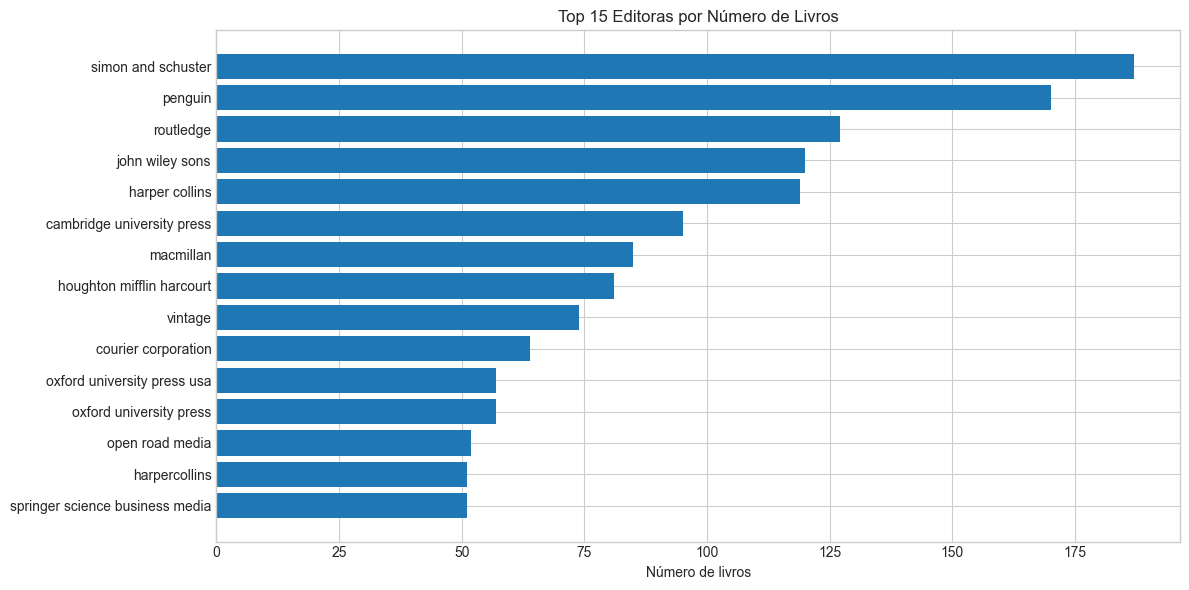

In [26]:
# Análise de editoras
print("=== ANÁLISE DE EDITORAS ===")
print(f"Editoras únicas: {books_data_clean['publisher_padrao'].nunique()}")
print(f"Registros sem editora: {books_data_clean['publisher_padrao'].isnull().sum()}")

print("\nTop 10 editoras com mais livros:")
editoras_count = books_data_clean['publisher_padrao'].value_counts()
print(editoras_count.head(10))

# Gráfico das top editoras
plt.figure(figsize=(12, 6))
top_editoras = editoras_count.head(15)
plt.barh(range(len(top_editoras)), top_editoras.values)
plt.yticks(range(len(top_editoras)), top_editoras.index)
plt.xlabel('Número de livros')
plt.title('Top 15 Editoras por Número de Livros')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Variável categories_padrao

=== ANÁLISE DE CATEGORIAS ===
Categorias únicas: 1465
Registros sem categoria: 2386

Top 10 categorias mais frequentes:
categories_padrao
fiction                      1342
history                       618
religion                      576
juvenile fiction              408
biography & autobiography     398
business & economics          354
computers                     316
social science                266
juvenile nonfiction           217
education                     184
Name: count, dtype: int64


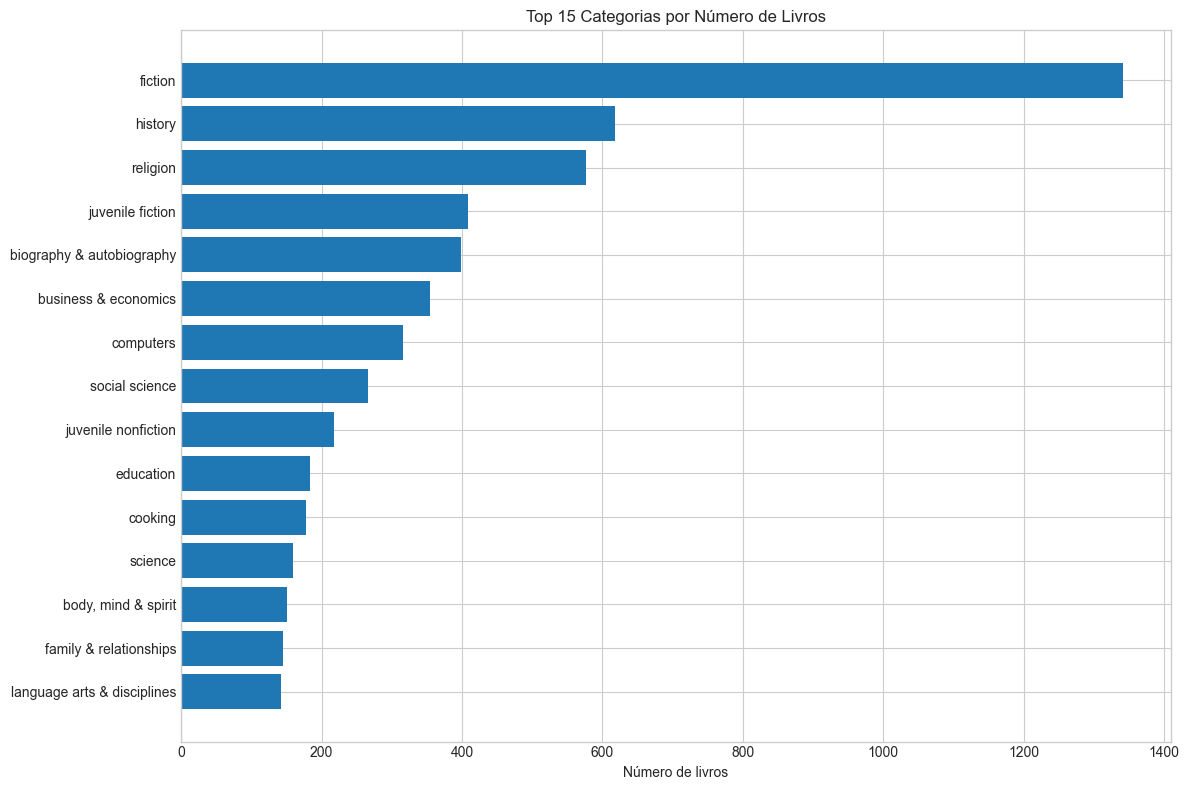

In [27]:
# Análise de categorias
print("=== ANÁLISE DE CATEGORIAS ===")
print(f"Categorias únicas: {books_data_clean['categories_padrao'].nunique()}")
print(f"Registros sem categoria: {books_data_clean['categories_padrao'].isnull().sum()}")

print("\nTop 10 categorias mais frequentes:")
categorias_count = books_data_clean['categories_padrao'].value_counts()
print(categorias_count.head(10))

# Gráfico das top categorias
plt.figure(figsize=(12, 8))
top_categorias = categorias_count.head(15)
plt.barh(range(len(top_categorias)), top_categorias.values)
plt.yticks(range(len(top_categorias)), top_categorias.index)
plt.xlabel('Número de livros')
plt.title('Top 15 Categorias por Número de Livros')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Variável publishedDate_padrao

In [28]:
# Análise de anos de publicação
print("=== ANÁLISE DE ANOS DE PUBLICAÇÃO ===")
print(f"Registros com ano: {books_data_clean['publishedDate_padrao'].notna().sum()}")
print(f"Registros sem ano: {books_data_clean['publishedDate_padrao'].isnull().sum()}")

# Estatísticas descritivas
print("\nEstatísticas dos anos:")
print(books_data_clean['publishedDate_padrao'].describe())

print("\nTop 10 anos com mais publicações:")
anos_count = books_data_clean['publishedDate_padrao'].value_counts()
print(anos_count.head(10))

=== ANÁLISE DE ANOS DE PUBLICAÇÃO ===
Registros com ano: 6089
Registros sem ano: 6833

Estatísticas dos anos:
count    6089.000000
mean     1987.738545
std        27.749116
min      1680.000000
25%      1985.000000
50%      1997.000000
75%      2002.000000
max      2022.000000
Name: publishedDate_padrao, dtype: float64

Top 10 anos com mais publicações:
publishedDate_padrao
2000.0    318
1999.0    304
2004.0    293
2002.0    286
1998.0    278
2003.0    272
2001.0    253
1997.0    252
2005.0    242
1996.0    202
Name: count, dtype: int64


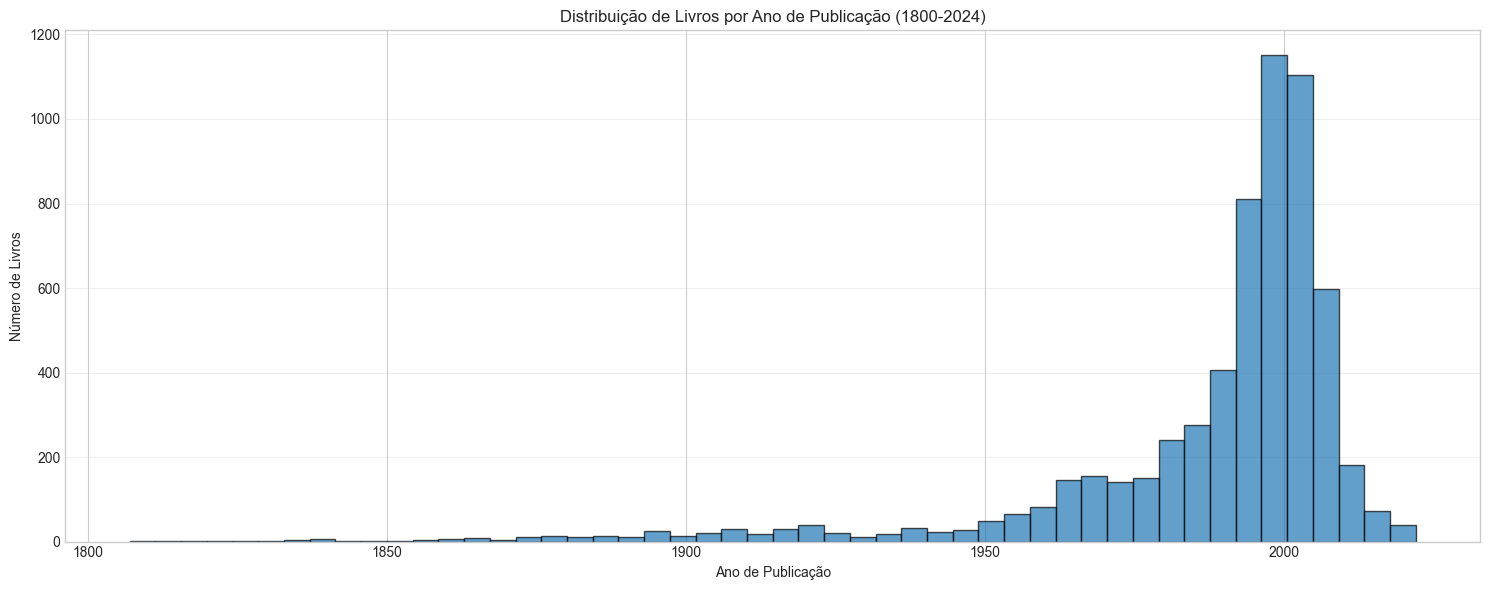

In [29]:
# Gráfico de distribuição temporal
plt.figure(figsize=(15, 6))

# Filtrar anos razoáveis (1800-2024)
anos_validos = books_data_clean[
    (books_data_clean['publishedDate_padrao'] >= 1800) & 
    (books_data_clean['publishedDate_padrao'] <= 2024)
]['publishedDate_padrao']

plt.hist(anos_validos, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Ano de Publicação')
plt.ylabel('Número de Livros')
plt.title('Distribuição de Livros por Ano de Publicação (1800-2024)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Salvar Dados Processados

In [30]:
# Salvar datasets limpos
books_data_clean.to_parquet('../data/processed/books_data_processed.parquet', index=False)
books_rating_clean.to_parquet('../data/processed/books_rating_processed.parquet', index=False)

print("Datasets processados salvos em ../data/processed/")
print(f"books_data_clean: {books_data_clean.shape}")
print(f"books_rating_clean: {books_rating_clean.shape}")

Datasets processados salvos em ../data/processed/
books_data_clean: (12922, 15)
books_rating_clean: (299748, 10)
